In [91]:
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [92]:
auto = pd.read_csv('birth_stat_norm.csv', na_values=['?'])
auto.dropna(inplace=True)
auto.reset_index(drop=True, inplace=True)
#for c in auto.columns:
#    print(c,end="+")

In [93]:
results = {}
Y_preds = {}
residuals = {}

In [94]:
for col in auto.columns:
    result = sm.ols(formula="birth ~ "+col, data=auto).fit()
    Y_pred = result.predict(auto[[col]])
    residual = auto["birth"].values-Y_pred
    results[col]=result
    Y_preds[col]=Y_pred
    residuals[col]=residual

In [95]:
results['died'].predict(auto['died'])

0        0.089965
1        0.089965
2        0.089965
3        0.187014
4        0.187014
5        0.089965
6        0.089965
7        0.089965
8        0.089965
9        0.089965
10       0.089965
11       0.089965
12       0.187014
13       0.089965
14       0.089965
15       0.089965
16       0.089965
17       0.089965
18       0.089965
19       0.284064
20       0.089965
21       0.089965
22       0.089965
23       0.089965
24       0.089965
25       0.089965
26       0.284064
27       0.089965
28       0.187014
29       0.089965
           ...   
26080    0.089965
26081    0.089965
26082    0.089965
26083    0.187014
26084    0.089965
26085    0.187014
26086    0.089965
26087    0.089965
26088    0.187014
26089    0.089965
26090    0.089965
26091    0.089965
26092    0.089965
26093    0.089965
26094    0.089965
26095    0.089965
26096    0.089965
26097    0.089965
26098    0.089965
26099    0.089965
26100    0.089965
26101    0.089965
26102    0.089965
26103    0.089965
26104    0

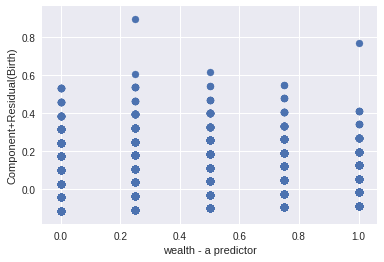

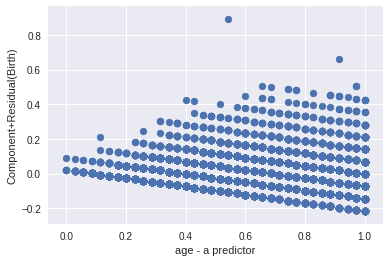

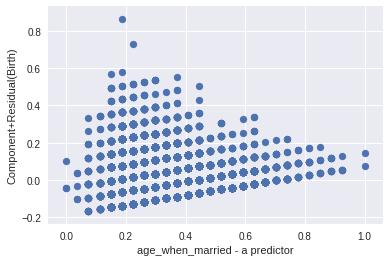

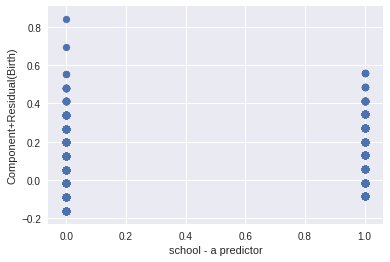

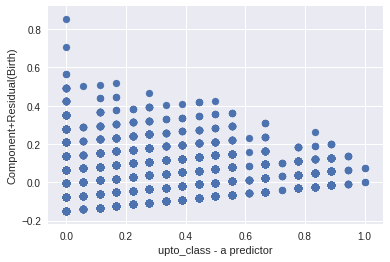

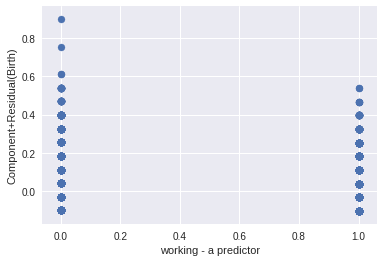

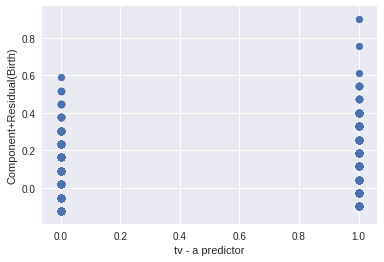

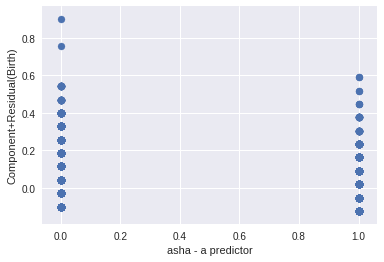

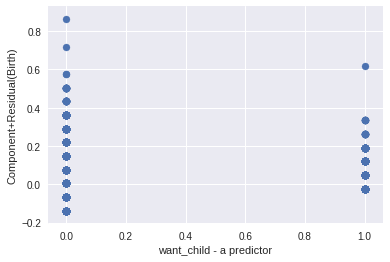

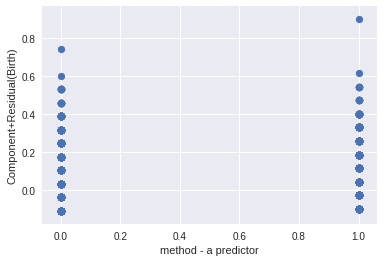

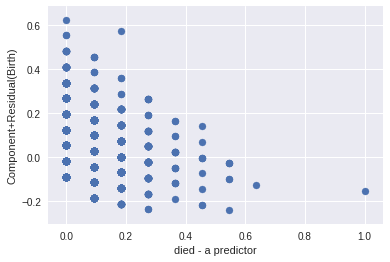

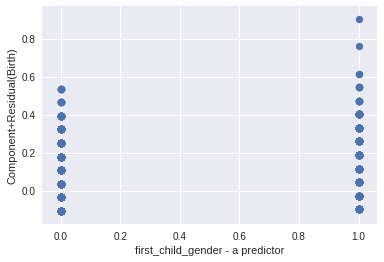

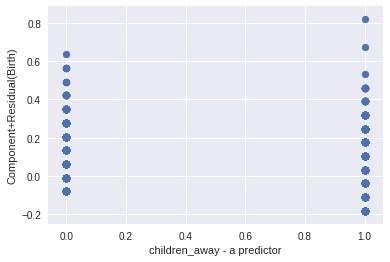

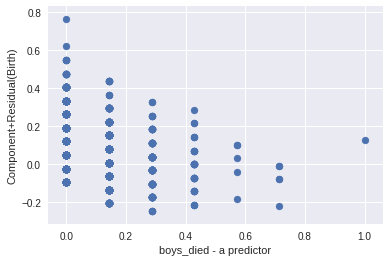

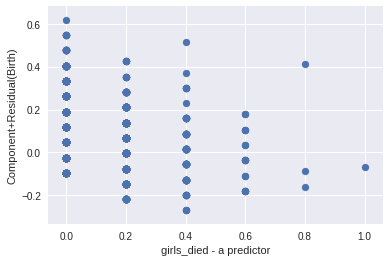

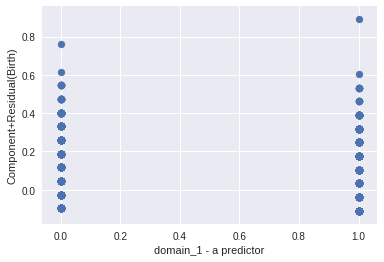

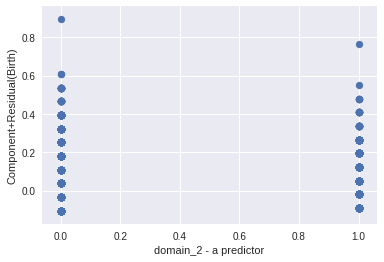

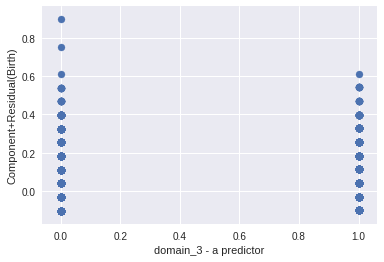

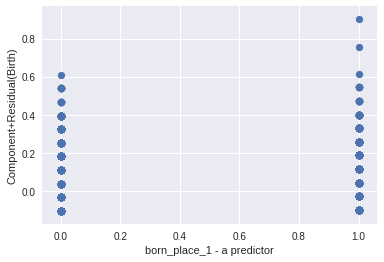

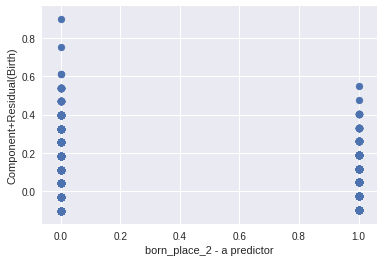

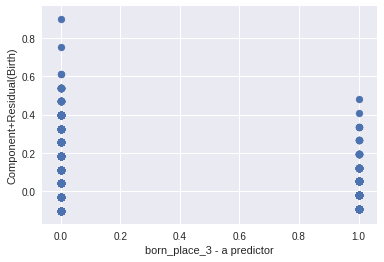

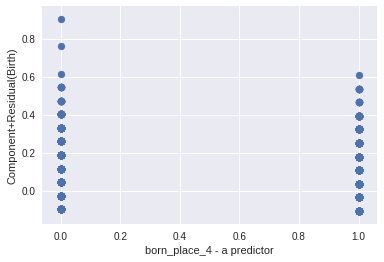

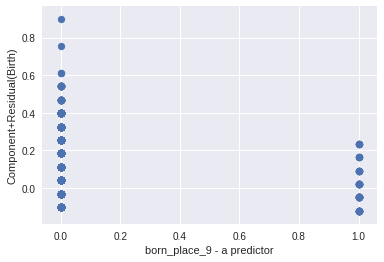

In [104]:
figs={}
for col in auto.columns:    
    if col != 'birth': 
        figs[col]=plt.figure()
        plt.scatter(auto[[col]],residuals[col])
        plt.xlabel(col+" - a predictor")
        plt.ylabel("Component+Residual(Birth)")
        #plt.plot(range(auto[col].idxmax()), linestyle='--', color='b', linewidth=1)
        plt.show()

In [105]:
for fig in figs:
    figs[fig].savefig("comp_plots/"+fig+".png")

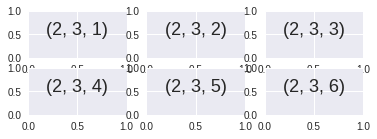

In [98]:
for i in range(1, 7):
    plt.subplot(4, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')